In [1]:
import os
from PIL import Image
import pytesseract
import cv2
import matplotlib as mpl
mpl.use('TkAgg')
from matplotlib import pyplot as plt
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)
from skimage import io
from skimage.color import rgb2gray
from skimage import img_as_uint
from skimage.exposure import equalize_adapthist

In [2]:
%matplotlib inline

In [3]:
path_image = '../01_alb_id.tif'

In [4]:
image = rgb2gray(io.imread(path_image))

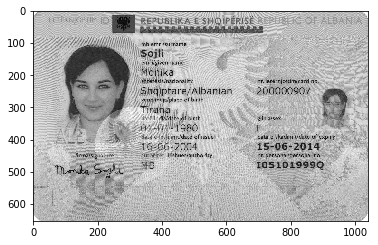

In [5]:
plt.imshow(image, cmap=plt.cm.gray)

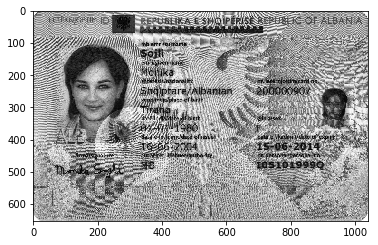

In [7]:
image_CLAHE = equalize_adapthist(image)
plt.imshow(image_CLAHE, cmap=plt.cm.gray)

In [8]:
binary_global = image_CLAHE > threshold_otsu(image_CLAHE)

thresh_niblack = threshold_niblack(image_CLAHE, window_size=25, k=0.8)
thresh_sauvola = threshold_sauvola(image_CLAHE, window_size=25)

binary_niblack = image_CLAHE > thresh_niblack
binary_sauvola = image_CLAHE > thresh_sauvola

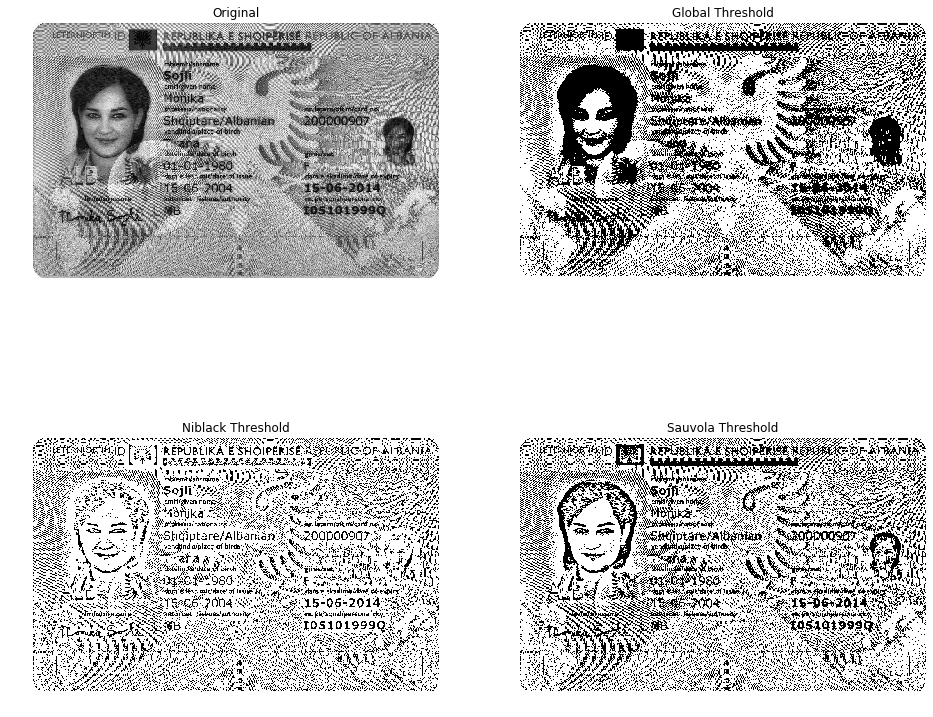

In [9]:
plt.figure(figsize=(16, 14))
plt.subplot(2, 2, 1)
plt.imshow(image_CLAHE, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.show()

In [10]:
io.imsave('../preprocessed_images/global_CLAHE.png', img_as_uint(binary_global))
io.imsave('../preprocessed_images/niblack_CLAHE.png', img_as_uint(binary_niblack))
io.imsave('../preprocessed_images/sauvola_CLAHE.png', img_as_uint(binary_sauvola))